# Imports:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Classes:

In [5]:
class SelfAvoidingRandomWalk:
    """
    the class to solve 2d self avoiding randomWalk
    walks is all the possible steps
    the algorithm is to solve the problem backward.we count all the possible paths and go one step back if the path is available then return the sum.

    methods:

    getAllPossiblePaths:
        the function to perform the recursive process and return the result
    backTrace:
        the recursive function to count all possible paths using backtrace
    """
    def __init__(self) -> None:
        """
        the function to construct the SelfAvoidingRandomWalk object
        """
        self.walks = [(1,0),(0,1),(-1,0),(0,-1)]

    def getAllPossiblePaths(self, n: int) -> int:
        """
        the function to perform the recursive process and return the result

        :param n:the size of the  map
        :type n:int
        :return:the count of all possible path
        :rtype:int
        """
        return self.backTrace(n,np.zeros((2*n,2*n)),n-1,n-1)

    def backTrace(self, n: int, memoryMap: np.ndarray, x: int, y: int) -> int:
        """
        the recursive function to count all possible paths using backtrace
        first check if the n is 0 so there is only one way
        light the point,try all walks and go back for new ways(meaning unoccupied points)then turn the point off again and return the count

        :param n:the size of map
        :type n:int
        :param memoryMap:the mop of the simulation (actually only the selected part of the whole map)
        :type memoryMap:np.ndarray
        :param x:the first coordinate of the selected point
        :type x:int
        :param y:the second coordinate of the selected point
        :type y:int
        :return:the count of the all possible paths in the selected area
        :rtype:int
        """
        if n==0:return 1
        else:
            memoryMap[0][0]=1
            count = 0
            for walk in self.walks:
                newX = x + walk[0]
                newY = y+walk[1]
                if memoryMap[newX][newY]== 0:
                    count += self.backTrace(n-1,memoryMap,newX,newY)
            memoryMap[x][y] = 0
            return count


#### Main Part:

In [24]:
sarw = SelfAvoidingRandomWalk()
data = []
for i in range(15):
    data.append(sarw.getAllPossiblePaths(i))


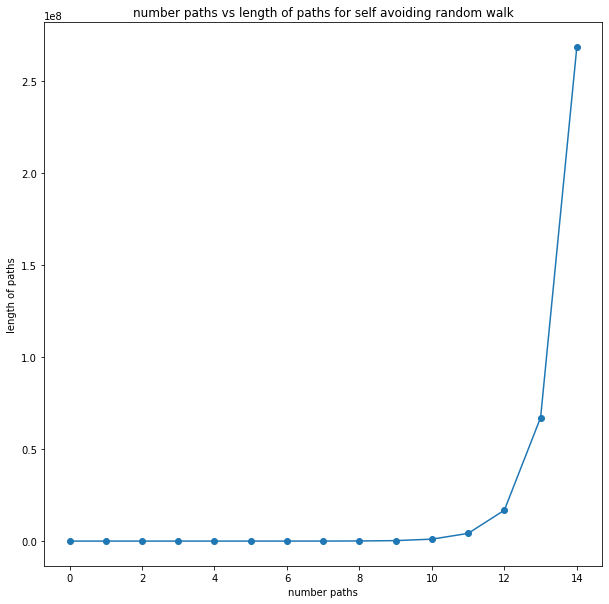

In [25]:
plt.figure(figsize=(10,10))
plt.title("number paths vs length of paths for self avoiding random walk")
plt.xlabel("number paths")
plt.ylabel("length of paths")
plt.scatter(np.arange(15),np.array(data))
plt.plot(np.arange(15),np.array(data))

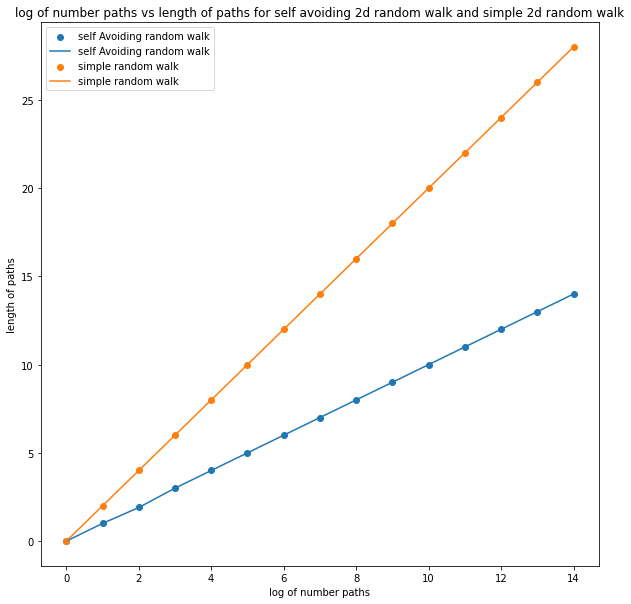

In [27]:
plt.figure(figsize=(10,10))
plt.title("log of number paths vs length of paths for self avoiding 2d random walk and simple 2d random walk")
plt.xlabel("log of number paths")
plt.ylabel("length of paths")
plt.scatter(np.arange(15),np.log(np.array(data))/np.log(4))
plt.plot(np.arange(15),np.log(np.array(data))/np.log(4))

plt.scatter(np.arange(15),np.arange(15)*2)
plt.plot(np.arange(15),np.arange(15)*2)
plt.legend(["self Avoiding random walk","self Avoiding random walk","simple random walk","simple random walk"])